*Imports*

In [9]:
import pandas as pd
from urllib.parse import urlparse
import matplotlib.pyplot as plt

*READING FILE*

In [3]:
df = pd.read_csv('ARABIC-NEWS-MERGED-CLASS-COLLECTED.csv')

In [4]:
df.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


In [5]:
df.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
count,12032,55149,49037,56055,10618,49973,2465
unique,7648,12,86,8,5318,12471,2419
top,اليمن -Yemen حملة COVID-19 vs F19,زائف,رياضة,df3,2024-04-12T01:59:53+03:00,[],['']
freq,200,37764,17035,37784,342,150,38


*ExtractING distinct values*

In [6]:
#LABEL
distinct_Label = df['Label'].unique()
print("Distinct Labels:", distinct_Label)

Distinct Labels: ['real' 'fake' 'reel' nan 'زائف' 'صحيح' 'اشاعة' 'مضلل' 'مفبرك' 'زائف جزئي'
 'ساخر' 'رأي' 'إشاعة']


In [7]:
#TOPIC
distinct_Topic = df['Topic'].unique()
print("Distinct Topic:", distinct_Topic)

Distinct Topic: ['politics' 'business' 'culture' 'sport' 'tech' 'opinion' 'turath' 'arts'
 'science' 'midan' 'lifestyle' 'family' 'Science and Technology' 'Sport'
 'Economic' 'middle-east' 'travel' 'science-and-health' 'entertainment'
 'style' 'world' 'Politics' 'Sports' 'Religion' 'Tech' 'Culture' 'Finance'
 'Medical' 'Social' 'Economy' 'Technology' 'Science' 'news' 'health'
 'Health' 'Other' 'Business' 'أخبار' 'ترفيه' 'تكنولوجيا' 'ثقافة وفن'
 'رياضة' 'سياسة' 'صحة' 'موسيقى' 'دينية, سياسي' nan 'سياسي' 'دينية'
 'اجتماعية, سياسي' 'زائف' 'مضلل' 'نفسي' 'تنس' 'جهاز' 'رئيس' 'حكومة' 'وباء'
 'مباراة' 'تصويت' 'مستشفى' 'شبكة' 'تقنية' 'لعبة' 'علاج' 'برلمان' 'إنترنت'
 'انتخابات' 'دواء' 'فريق' 'برمجة' 'قرار' 'ابتكار' 'تحديث' 'ذكاء اصطناعي'
 'طب' 'جائزة' 'كرة القدم' 'تغذية' 'مدرب' 'تطبيق' 'صحي' 'قانون' 'مرض'
 'بطولة' 'ديمقراطية' 'رياضي']


*VISUALISATION OF COLUMNS DISTRIBUTIONS*

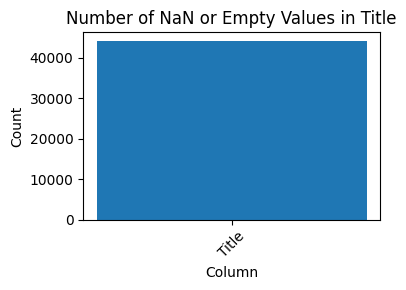

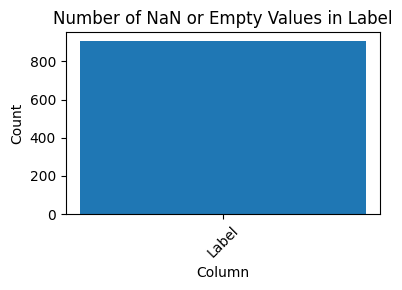

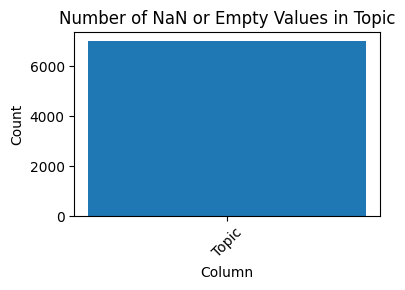

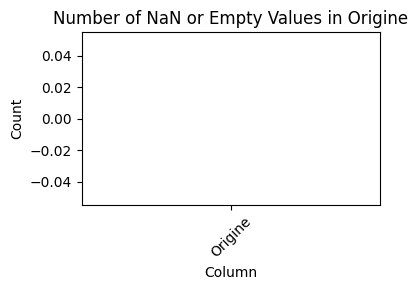

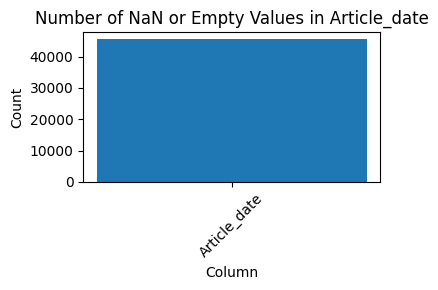

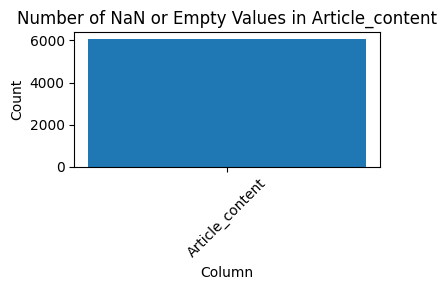

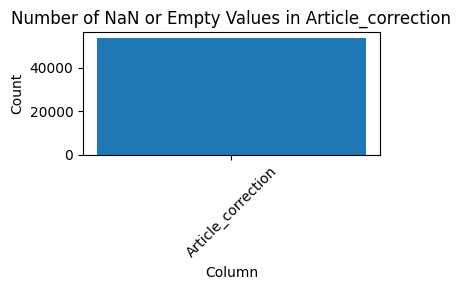

In [17]:
# Plot the statistics for each column
for column in df.columns:
    nan_count = df[column].isna().sum()
    plt.figure(figsize=(4, 3))
    plt.bar(column, nan_count)
    plt.title(f'Number of NaN or Empty Values in {column}')
    plt.xlabel('Column')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

*UNIFYING THE LABEL VALUES*

In [18]:
# Map 'صحيح' to 'True' and all other values to 'Fake', keeping 'nan' as is
legitimacy_mapping = {
    'صحيح': 'real',
    'اشاعة': 'fake',
    'مضلل': 'fake',
    'زائف': 'fake',
    'مفبرك': 'fake',
    'زائف جزئي': 'fake',
    'ساخر': 'fake',
    'رأي': 'fake',
    'reel' : 'real'
}

# Map legitimacy values
df['Label'] = df['Label'].map(legitimacy_mapping)

In [19]:
#LABEL
distinct_Label = df['Label'].unique()
print("Distinct Labels:", distinct_Label)

Distinct Labels: [nan 'real' 'fake']


*UNIFYING THE TOPIC VALUES*

In [20]:
# Define a dictionary to map distinct topics to unified categories
topic_map = {
    'politics': 'politics',
    'business': 'business',
    'culture': 'culture',
    'sport': 'sport',
    'tech': 'technology',
    'opinion': 'opinion',
    'turath': 'culture',
    'arts': 'culture',
    'science': 'science',
    'midan': 'politics',
    'lifestyle': 'lifestyle',
    'family': 'lifestyle',
    'science and technology': 'science',
    'economic': 'business',
    'middle-east': 'world',
    'travel': 'lifestyle',
    'science-and-health': 'science',
    'entertainment': 'entertainment',
    'style': 'lifestyle',
    'world': 'world',
    'religion': 'culture',
    'finance': 'business',
    'medical': 'science',
    'social': 'lifestyle',
    'economy': 'business',
    'news': 'world',
    'health': 'science',
    'other': 'other',
    'أخبار': 'world',
    'ترفيه': 'entertainment',
    'تكنولوجيا': 'technology',
    'ثقافة وفن': 'culture',
    'رياضة': 'sport',
    'سياسة': 'politics',
    'صحة': 'science',
    'موسيقى': 'entertainment',
    'دينية, سياسي': 'religion',
    'سياسي': 'politics',
    'دينية': 'religion',
    'اجتماعية, سياسي': 'politics',
    'زائف': 'other',
    'مضلل': 'other',
    'نفسي': 'other',
    'تنس': 'sport',
    'جهاز': 'technology',
    'رئيس': 'politics',
    'حكومة': 'politics',
    'وباء': 'science',
    'مباراة': 'sport',
    'تصويت': 'politics',
    'مستشفى': 'health',
    'شبكة': 'technology',
    'لعبة': 'entertainment',
    'علاج': 'health',
    'برلمان': 'politics',
    'إنترنت': 'technology',
    'انتخابات': 'politics',
    'دواء': 'health',
    'فريق': 'sport',
    'برمجة': 'technology',
    'قرار': 'politics',
    'ابتكار': 'technology',
    'تحديث': 'technology',
    'ذكاء اصطناعي': 'technology',
    'طب': 'health',
    'جائزة': 'other',
    'كرة القدم': 'sport',
    'تغذية': 'health',
    'مدرب': 'sport',
    'تطبيق': 'technology',
    'صحي': 'health',
    'قانون': 'politics',
    'مرض': 'health',
    'بطولة': 'sport',
    'ديمقراطية': 'politics',
    'رياضي': 'sport',
}

# Map TOPIC values
df['Topic'] = df['Topic'].map(topic_map)


In [21]:
#TOPIC
distinct_Topic = df['Topic'].unique()
print("Distinct Topic:", distinct_Topic)

Distinct Topic: ['politics' 'business' 'culture' 'sport' 'technology' 'opinion' 'science'
 'lifestyle' nan 'world' 'entertainment' 'religion' 'other' 'health']


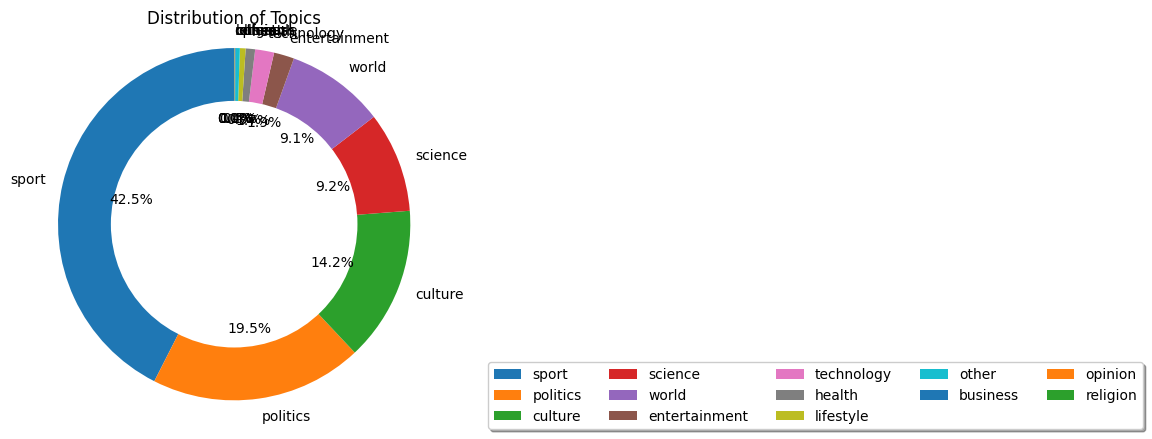

In [28]:
# Assuming distinct_Topic contains the unique topics
distinct_Topic = df['Topic'].unique()

# Count the occurrences of each topic in the DataFrame
topic_counts = df['Topic'].value_counts()

# Create a doughnut chart
plt.figure(figsize=(5, 5))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(loc="lower center", bbox_to_anchor=(2, -0.05), fancybox=True, shadow=True, ncol=5)

plt.title('Distribution of Topics')
plt.axis('equal')
plt.show()

*HANDELING THE MISSING VALUES FOR EACH COLUMN/LINE*